# Task 01 - BASICS
## Pattern Recognition and Machine Learning
#### import 

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from basics import *
import time as t

## A) Short NumPy introduction

### NumPy
NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays [[1]](https://en.wikipedia.org/wiki/NumPy).

**If you are unfamiliar with NumPy**, please start with [NumPy Quickstart](https://numpy.org/doc/stable/user/quickstart.html) or [Numpy Introduction](https://www.w3schools.com/python/numpy/numpy_intro.asp) or tutorial according to [your preference](https://letmegooglethat.com/?q=How+to+start+with+numpy).


### PyPlot
**matplotlib.pyplot** is a collection of functions for figures creation and plotting. The matplotlib is designed to work similar to MATLAB - [PyPlot Introduction](https://matplotlib.org/stable/tutorials/introductory/index.html).

For majority of the task we prepared all plotting functions. However, we recomend to be familiar with this library as well. It will be useful for debugging your assignments and for your future projects outside the RPZ scope.

### What to Avoid?
Try to **avoid loops** for numeric operations. Loops are slow in a pure Python. Instead, try to find NumPy alternative. Maximal evaluation time in AE BRUTE is 15 minutes. For simple tasks it is more then enought. However, during semester will be crucial to avoid loops to do not exceed evaluation limit.

Look for a following example of a simple mean computation with loops and with the NumPy function, think about the speed and also about a code readability.

#### a) Generate data

In [4]:
# generate (1000000,5) random numbers from -5 to 10 (uniform distribution)
M = np.random.uniform(low=-5.0, high=10.0, size=(1000000, 5))

#### b) Loops

In [5]:
t1 = t.time()

H, W = M.shape
M_sum_loop = np.zeros((W, ), dtype=float)
for i in range(W):
    current_sum = 0.0
    for j in range(H):
        current_sum += M[j,i]
    M_sum_loop[i] = current_sum / H

t2 = t.time()

In [6]:
print(M_sum_loop)
print(f'Loop time: {t2 - t1:.3f} seconds')

[2.49628516 2.50501001 2.49567519 2.49791683 2.49414662]
Loop time: 1.205 seconds


#### c) Numpy function

In [7]:
t1 = t.time()

M_sum_numpy = np.mean(M, axis=0)

t2 = t.time()

In [7]:
print(M_sum_numpy)
print(f'Numpy time: {t2 - t1:.3f} seconds')

[2.5060832  2.49536187 2.49411457 2.5075368  2.50928338]
Numpy time: 0.038 seconds


### Useful NumPy functions

You may find useful following function for this and future assignments. Read [the documentation](https://numpy.org/doc/stable/reference/index.html).

* np.array(), np.shape(), np.dot(), np.mean(), np.sum(), **np.cumsum()**
* np.min(), np.max(), **np.argmin(), np.argmax()**, np.amin(), np.amax()
* **np.sort(), np.argsort()**
* **np.concatenate(), np.squeeze(), np.flatten(), np.expand_dims()**
* **np.stack()**, np.vstack(), np.hstack(), np.dstack()
* np.logical_and(), np.logical_not(), np.logical_or()
* np.linspace(), np.histogram(), np.meshgrid()
* **.shape, .astype(), np.reshape()**
* np.kron(), np.tile()
* np.unique()
* **np.linarg.norm()**
* and many others

## B) Matrix manipulation with NumPy

Now you know basic NumPy operations. In the first part of today’s assignment, you will start with some simple matrix manipulation tasks. **Try to avoid loops**. Full text of the assignment is written on the [RPZ CW](https://cw.fel.cvut.cz/). 


#### sample data creation

In [8]:
A = np.array([[16,  2,  3, 13],
              [ 5, 11, 10,  8],
              [ 9,  7,  6, 12],
              [ 4, 14, 15,  1]])

B = np.array([[ 3, 4, 9, 4, 3, 6, 6, 2, 3, 4],
              [ 9, 2,10, 1, 4, 3, 7, 1, 3, 5]])

#### the function you are suppose to implement

In [9]:
output = matrix_manip(A,B)

#### output

In [10]:
for key in sorted(output.keys()):
    print ('{}:\n{}\n'.format(key, output[key]))
# A_3rd_col:
# [[ 3]
#  [10]
#  [ 6]
#  [15]]

# A_gr_inc:
# [[17  2  3 14  1]
#  [ 6 12 11  9  1]
#  [10  8  7 13  1]
#  [ 5 15 16  1  1]]

# A_slice:
# [[ 7  6 12]
#  [14 15  1]]

# A_transpose:
# [[16  5  9  4]
#  [ 2 11  7 14]
#  [ 3 10  6 15]
#  [13  8 12  1]]

# A_weighted_col_sum:
# 391.0

# C:
# [[499 286 390 178]
#  [286 383 351 396]
#  [390 351 383 296]
#  [178 396 296 508]]

# D:
# [[-1  0  5  0 -1  2  2 -2 -1  0]
#  [ 3 -4  4 -5 -2 -3  1 -5 -3 -1]]

# D_select:
# [[ 0  5  0 -2]
#  [-4  4 -5 -5]]

A_3rd_col:
[[ 3]
 [10]
 [ 6]
 [15]]

A_gr_inc:
[[17  2  3 14  1]
 [ 6 12 11  9  1]
 [10  8  7 13  1]
 [ 5 15 16  1  1]]

A_slice:
[[ 7  6 12]
 [14 15  1]]

A_transpose:
[[16  5  9  4]
 [ 2 11  7 14]
 [ 3 10  6 15]
 [13  8 12  1]]

A_weighted_col_sum:
391.0

C:
[[499 286 390 178]
 [286 383 351 396]
 [390 351 383 296]
 [178 396 296 508]]

D:
[[-1  0  5  0 -1  2  2 -2 -1  0]
 [ 3 -4  4 -5 -2 -3  1 -5 -3 -1]]

D_select:
[[ 0  5  0 -2]
 [-4  4 -5 -5]]



## C) Simple data task in Python

#### Load data

In [2]:
loaded_data = np.load("data_33rpz_basics.npz")
alphabet = loaded_data["alphabet"]
images = loaded_data["images"]
labels = loaded_data["labels"]

In [4]:
np.where(alphabet == 'T')[0]

array([15])

#### Compute letters' means and save images

In [3]:
initialMean1 = compute_letter_mean("T", alphabet, images, labels)
Image.fromarray(initialMean1, mode='L').save("initial1_mean.png")

initialMean2 = compute_letter_mean("K", alphabet, images, labels)
Image.fromarray(initialMean2, mode='L').save("initial2_mean.png")

####  Show images

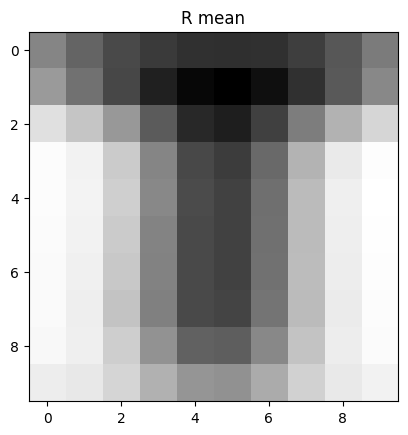

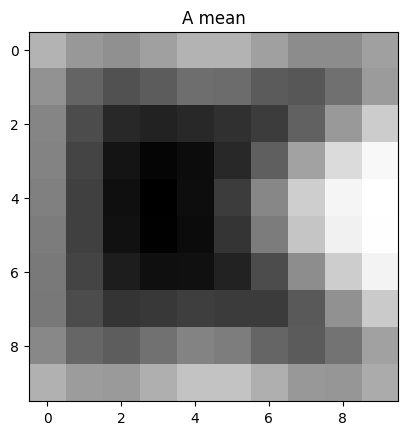

In [4]:
plt.figure()
plt.title("R mean")
plt.imshow(initialMean1, cmap='gray')

plt.figure()
plt.title("A mean")
plt.imshow(initialMean2, cmap='gray')
plt.show()

In [5]:
plot_letter_mean_interactive(alphabet, images, labels)

interactive(children=(Dropdown(description='letter', index=13, options=('A', 'B', 'C', 'D', 'E', 'H', 'I', 'J'…

#### Compute histograms

In [16]:
features_1 = compute_lr_features('A', alphabet, images, labels)
print(features_1)
# [  120  1223  -144  -161   197 -2921  -998  -944  -120  -304  -884 -1461
#  -1233  1444  1705  1332   881   212    92   319 -3104 -2829   255     1
#  -1763  2230  1916  -335  -257 -3568 -5204 -1144  -641   525   182  -768
#   -844  1536  1139   522   495   353  -251  1345   439  1114 -2087  -107
#   -563  1491 -1935 -1640  1979  2215   906  1726  1332   365   825  2776
#   1282   708  1010   429  1141  1145  1896     7  -642  -657    36   368
#   1079    79  -483   327  -135   888  2270  2211  3860  1248  1371  -857
#    100  -134  -946  1954  1979 -1575  -837  1363   803   546 -1916 -1808
#    370  -435  -363   497]

[  120  1223  -144  -161   197 -2921  -998  -944  -120  -304  -884 -1461
 -1233  1444  1705  1332   881   212    92   319 -3104 -2829   255     1
 -1763  2230  1916  -335  -257 -3568 -5204 -1144  -641   525   182  -768
  -844  1536  1139   522   495   353  -251  1345   439  1114 -2087  -107
  -563  1491 -1935 -1640  1979  2215   906  1726  1332   365   825  2776
  1282   708  1010   429  1141  1145  1896     7  -642  -657    36   368
  1079    79  -483   327  -135   888  2270  2211  3860  1248  1371  -857
   100  -134  -946  1954  1979 -1575  -837  1363   803   546 -1916 -1808
   370  -435  -363   497]


In [6]:
letters = 'TK'
features_1 = compute_lr_features(letters[0], alphabet, images, labels)
features_2 = compute_lr_features(letters[1], alphabet, images, labels)

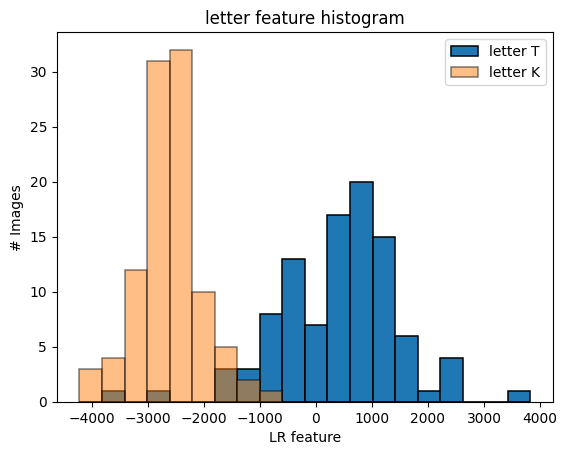

In [7]:
plot_letter_feature_histogram(features_1, features_2, letters, n_bins=20)
plt.savefig("initials_histograms.png")

In [8]:
plot_letter_feature_histogram_interactive(alphabet, images, labels)

interactive(children=(Dropdown(description='letterA', index=13, options=('A', 'B', 'C', 'D', 'E', 'H', 'I', 'J…